In [1]:
from statsbombpy import sb

import pandas as pd

import numpy as np

import os

import warnings
warnings.filterwarnings("ignore")

import ast

email = "nathan.talbot@etu.uca.fr"
password = os.environ["mdp_statsbomb"]
creds = {"user" : email, "passwd" : password}

In [2]:
dico_annee = {"2023_2024" : ["Auxerre", "Angers", "Saint-Étienne", "Rodez", "Paris FC"],
              "2022_2023" : ["Le Havre", "Metz", "Bordeaux", "Bastia", "Caen"],
              "2021_2022" : ["Toulouse", "AC Ajaccio", "Auxerre", "Paris FC", "Sochaux"],
              "2020_2021" : ["Troyes", "Clermont Foot", "Toulouse", "Grenoble Foot", "Paris FC"]}

In [157]:
for annee in dico_annee.keys() :

    df_annee = pd.DataFrame()

    liste_match = pd.read_excel(f"../../../Data/Event SB ligue 2/{annee}/liste_match.xlsx", index_col = 0).squeeze()

    serie_match = []

    for match in liste_match :

        df = pd.DataFrame()

        event = pd.read_excel(f"../../../Data/Event SB ligue 2/{annee}/{match}.xlsx", index_col = 0)
        event.location = event.location.fillna("[60, 40]").apply(ast.literal_eval)
        shot = event[(event.type == "Shot") & (event.shot_type != "Penalty")]
        shot = shot.groupby(["period", "possession"], sort = False).head(1).set_index(["period", "possession"])
        
        if len(shot) > 0 :      
            deb_action = event.groupby(["period", "possession"], sort = False).head(1).set_index(["period", "possession"]).loc[shot.index]
            
            loc_deb_action = pd.DataFrame(deb_action.location.tolist(), index = deb_action.index)
            
            df = pd.concat([df, pd.concat([loc_deb_action, deb_action.possession_team], axis = 1)], axis = 0)
        
            df_annee = pd.concat([df_annee, df], axis = 0, ignore_index = True)

            serie_match += [f"{match}"]*len(df)

    df_annee["match_id"] = serie_match

    if 2 in df_annee.columns :
        df_annee.drop(2, axis = 1, inplace = True)

    df_annee.columns = ["x", "y", "Équipe", "match_id"]

    df_annee["Top 5"] = df_annee["Équipe"].isin(dico_annee[annee])
    

In [159]:
df_annee

,x,y,Équipe,match_id,Top 5
0,75.7,60.5,Auxerre,3896699,True
1,7.0,36.1,Dunkerque,3896699,False
2,12.8,33.0,Auxerre,3896699,True
3,71.5,0.1,Auxerre,3896699,True
4,33.2,25.5,Auxerre,3896699,True
5,23.7,51.4,Auxerre,3896699,True
6,69.5,64.9,Auxerre,3896699,True
7,6.0,36.0,Auxerre,3896699,True
8,120.0,80.0,Auxerre,3896699,True
9,102.1,80.0,Auxerre,3896699,True


In [127]:
event.groupby(["period", "possession"], sort = False).head(1).set_index(["period", "possession"]).loc[shot.index]

type shot_outcome possession_team           location  \
period possession                                                         
1      11          Pass          NaN         Auxerre       [75.7, 60.5]   
       12          Pass          NaN       Dunkerque        [7.0, 36.1]   
       15          Pass          NaN         Auxerre       [12.8, 33.0]   
       24          Pass          NaN         Auxerre        [71.5, 0.1]   
       33          Pass          NaN         Auxerre       [33.2, 25.5]   
       37          Pass          NaN         Auxerre       [23.7, 51.4]   
       44          Pass          NaN         Auxerre       [69.5, 64.9]   
       52          Pass          NaN         Auxerre        [6.0, 36.0]   
       59          Pass          NaN         Auxerre      [120.0, 80.0]   
       62          Pass          NaN         Auxerre      [102.1, 80.0]   
       74          Pass          NaN         Auxerre       [49.5, 15.1]   
       75          Pass          NaN         Auxerre      [120.0, 80.0]   
       77          Pass          NaN       Dunkerque      [120.0, 80.0]   
2      89          Pass          NaN         Auxerre       [120.0, 0.1]   
       95          Pass          NaN         Auxerre       [110.2, 0.1]   
       100         Pass          NaN         Auxerre      [113.3, 10.6]   
       102         Pass          NaN         Auxerre       [57.3, 52.9]   
       109         Pass          NaN       Dunkerque      [120.0, 80.0]   
       113         Pass          NaN         Auxerre       [59.5, 80.0]   
       118         Pass          NaN         Auxerre       [120.0, 0.1]   
       121         Pass          NaN         Auxerre       [120.0, 0.1]   
       122         Pass          NaN       Dunkerque        [6.0, 36.0]   
       136         Pass          NaN         Auxerre      [101.6, 80.0]   
       140         Pass          NaN       Dunkerque      [115.9, 57.5]   
       153         Pass          NaN         Auxerre       [30.5, 47.4]   
       160         Pass          NaN         Auxerre        [48.8, 0.1]   
       170         Pass          NaN       Dunkerque       [15.3, 35.4]   
       172         Pass          NaN       Dunkerque       [120.0, 0.1]   
       179         Shot        Off T       Dunkerque  [89.4, 58.0, 0.0]   

                   shot_type  
period possession             
1      11                NaN  
       12                NaN  
       15                NaN  
       24                NaN  
       33                NaN  
       37                NaN  
       44                NaN  
       52                NaN  
       59                NaN  
       62                NaN  
       74                NaN  
       75                NaN  
       77                NaN  
2      89                NaN  
       95                NaN  
       100               NaN  
       102               NaN  
       109               NaN  
       113               NaN  
       118               NaN  
       121               NaN  
       122               NaN  
       136               NaN  
       140               NaN  
       153               NaN  
       160               NaN  
       170               NaN  
       172               NaN  
       179         Free Kick

In [87]:
event.groupby(["period", "possession"], as_index = True, sort = False).head(1).head(20)

,type,possession,shot_outcome,possession_team,location,shot_type,period
0,Starting XI,1,NaN,Auxerre,"[60, 40]",NaN,1
4,Half Start,84,NaN,Auxerre,"[60, 40]",NaN,2
6,Pass,2,NaN,Dunkerque,"[61.0, 40.1]",NaN,1
10,Pass,3,NaN,Auxerre,"[25.6, 0.1]",NaN,1
12,Pass,4,NaN,Dunkerque,"[71.9, 69.6]",NaN,1
17,Pass,5,NaN,Auxerre,"[70.6, 80.0]",NaN,1
18,Pass,6,NaN,Auxerre,"[70.7, 80.0]",NaN,1
22,Pass,7,NaN,Dunkerque,"[29.0, 11.6]",NaN,1
30,Pass,8,NaN,Auxerre,"[42.2, 17.5]",NaN,1
38,Pass,9,NaN,Auxerre,"[91.5, 69.5]",NaN,1


In [25]:
event.groupby(["period", "possession"]).head(1).set_index(["period", "possession"]).index

MultiIndex([(1,   1),
            (2,  84),
            (1,   2),
            (1,   3),
            (1,   4),
            (1,   5),
            (1,   6),
            (1,   7),
            (1,   8),
            (1,   9),
            ...
            (2, 178),
            (1,  36),
            (1,  39),
            (1,  48),
            (1,  66),
            (2, 169),
            (2, 179),
            (2, 167),
            (1,  26),
            (2, 168)],
           names=['period', 'possession'], length=180)

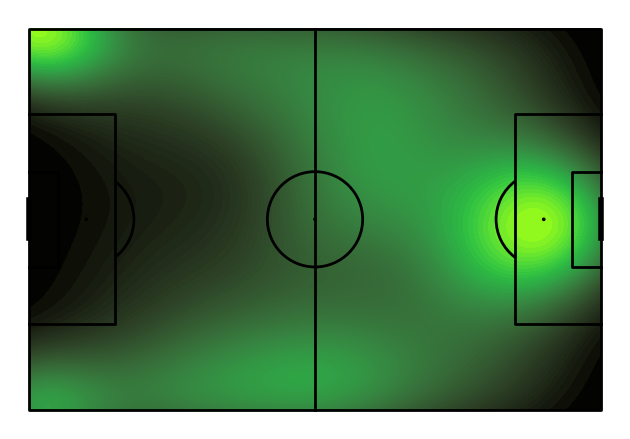

In [20]:
pitch = Pitch(pitch_type = "statsbomb", line_color = '#000000', line_zorder = 2)
fig, ax = pitch.draw()
kde = pitch.kdeplot(df_annee[0], df_annee[1], cmap = cmr.nuclear, ax = ax, fill = True, levels = 100, thresh = 0)

Text(0.5, 0.5, "Heatmap des débuts d'actions menant à un but en ligue 2")

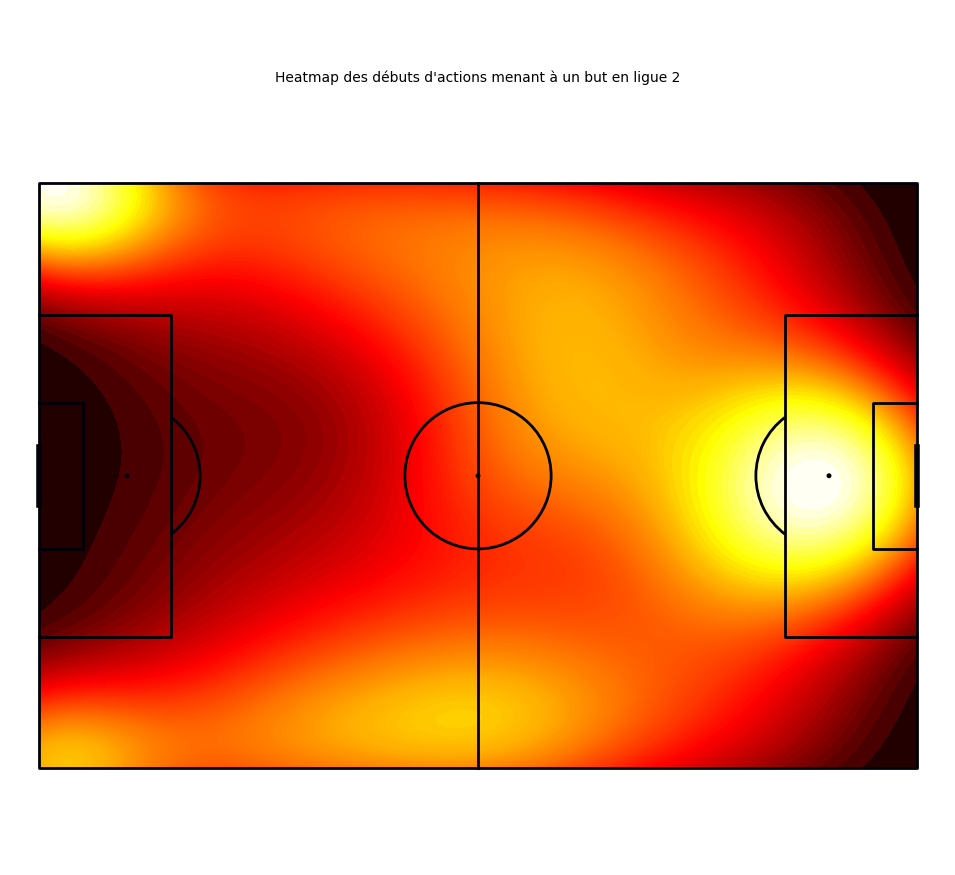

In [371]:
pitch = Pitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.grid(axis = False)
kde = pitch.kdeplot(df_annee[0], df_annee[1], ax=ax['pitch'], fill = True, levels=100, thresh=0, cmap='hot')
ax["title"].text(0.5, 0.5, "Heatmap des débuts d'actions menant à un but en ligue 2", va = "center", ha = "center")

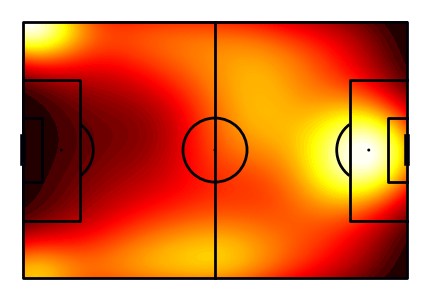

In [352]:
pitch = Pitch(line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(df_annee[0], df_annee[1], ax=ax, fill = True, levels=100, cut = 4, thresh=0, cmap='hot')